In [2]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the training data from a CSV file
data = pd.read_csv('train.csv')

In [4]:
# Convert data to a NumPy array for efficient computation
data = np.array(data)

In [5]:
# Shuffle the data randomly to ensure randomness in the dataset
np.random.shuffle(data)

In [6]:
# Split the dataset into a development set and a training set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:].astype(float) / 255.0  # Normalize input data

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:].astype(float) / 255.0  # Normalize input data

_, m_train = X_train.shape

In [7]:
# Initialize parameters of the neural network randomly
def init_params():
    W1 = np.random.rand(50, 784) - 0.5
    b1 = np.random.rand(50, 1) - 0.5
    W2 = np.random.rand(20, 50) - 0.5
    b2 = np.random.rand(20, 1) - 0.5
    W3 = np.random.rand(10, 20) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [8]:
# Forward propagation in the neural network
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

In [9]:
# Backward propagation in the neural network
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m_train * dZ3.dot(A2.T)
    db3 = 1 / m_train * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

In [10]:
# Train the neural network using gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            predictions = make_predictions(X, W1, b1, W2, b2, W3, b3)
            accuracy = get_accuracy(predictions, Y)
            print("Iteration:", i, "Accuracy:", accuracy)
    return W1, b1, W2, b2, W3, b3

In [11]:
# Make predictions for a given set of inputs
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

In [12]:
# Test prediction for a specific index in the training set
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [13]:
# ReLU activation function
def ReLU(Z):
    return np.maximum(Z, 0)

In [14]:
# Derivative of ReLU activation function
def ReLU_deriv(Z):
    return Z > 0

In [15]:
# Softmax activation function
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [16]:
# Convert labels to one-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [17]:
# Get the predicted labels by selecting the index with the highest probability
def get_predictions(A3):
    return np.argmax(A3, axis=0)

In [18]:
# Calculate the accuracy of the predictions
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [19]:
# Update parameters using gradient descent
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

In [20]:
# Train the neural network with the updated code
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0 Accuracy: 0.17712195121951219
Iteration: 10 Accuracy: 0.38034146341463415
Iteration: 20 Accuracy: 0.5058780487804878
Iteration: 30 Accuracy: 0.5845121951219512
Iteration: 40 Accuracy: 0.6377073170731707
Iteration: 50 Accuracy: 0.6760487804878049
Iteration: 60 Accuracy: 0.7038536585365853
Iteration: 70 Accuracy: 0.7275853658536585
Iteration: 80 Accuracy: 0.747609756097561
Iteration: 90 Accuracy: 0.7625121951219512
Iteration: 100 Accuracy: 0.7762682926829269
Iteration: 110 Accuracy: 0.7862682926829269
Iteration: 120 Accuracy: 0.797
Iteration: 130 Accuracy: 0.8042682926829269
Iteration: 140 Accuracy: 0.8119024390243903
Iteration: 150 Accuracy: 0.8183658536585365
Iteration: 160 Accuracy: 0.8240243902439024
Iteration: 170 Accuracy: 0.8292926829268292
Iteration: 180 Accuracy: 0.8343414634146341
Iteration: 190 Accuracy: 0.8390243902439024
Iteration: 200 Accuracy: 0.8421463414634146
Iteration: 210 Accuracy: 0.8460243902439024
Iteration: 220 Accuracy: 0.8492195121951219
Iteration: 

Prediction: [4]
Label: 4


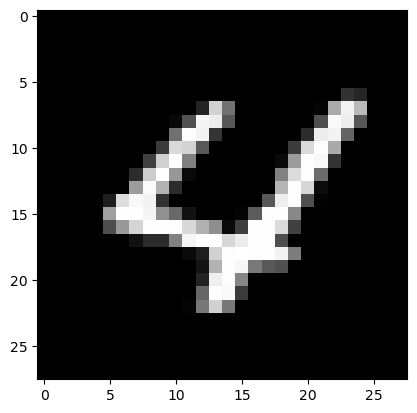

Prediction: [0]
Label: 0


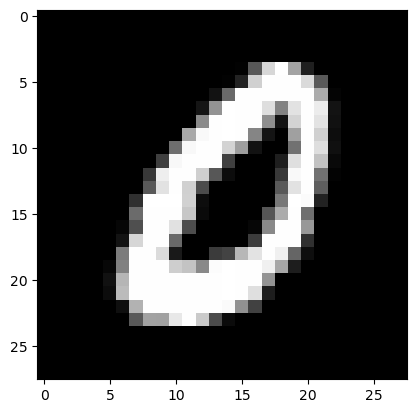

Prediction: [5]
Label: 5


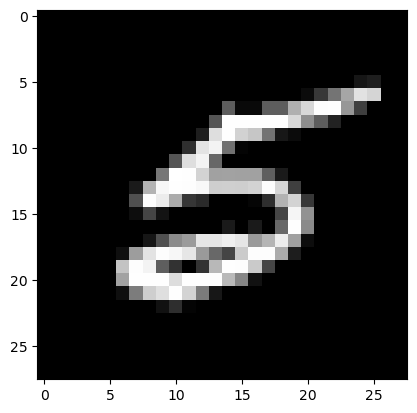

Prediction: [6]
Label: 6


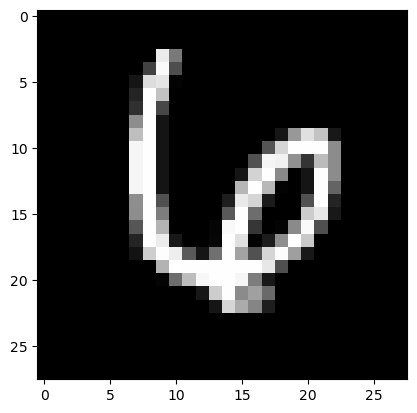

In [21]:
# Test the predictions on specific examples
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)
